<a href="https://colab.research.google.com/github/Only-Mike/DeepLearning-and-AI/blob/main/GroupAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Required Libraries
import pandas as pd
import numpy as np 
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('https://sds-aau.github.io/SDS-master/M1/data/cities.csv')

In [3]:
data.head()

,place,alpha-2,region,sub-region,cost_nomad,cost_coworking,cost_expat,coffee_in_cafe,cost_beer,places_to_work,...,fragile_states_index,press_freedom_index,female_friendly,lgbt_friendly,friendly_to_foreigners,racism,leisure,life_score,nightlife,weed
0,Budapest,HU,Europe,Eastern Europe,1364.0,152.41,1273.0,1.73,1.73,1.0,...,52.7,28.17,1.0,0.27,0.6,0.40,0.80,0.86,1.00,0.0
1,Chiang Mai,TH,Asia,South-eastern Asia,777.0,98.88,780.0,0.85,0.85,0.8,...,78.8,44.53,0.8,0.60,0.6,0.40,0.62,0.75,0.40,0.0
2,Phuket,TH,Asia,South-eastern Asia,1012.0,155.43,1714.0,1.41,1.41,0.8,...,78.8,44.53,0.6,0.80,0.6,0.42,0.60,0.75,0.82,0.0
3,Bangkok,TH,Asia,South-eastern Asia,1197.0,131.41,1158.0,2.12,2.12,1.0,...,78.8,44.53,0.8,0.80,1.0,0.42,0.82,0.72,1.00,0.0
4,Ko Samui,TH,Asia,South-eastern Asia,1352.0,169.56,1347.0,1.41,1.41,0.8,...,78.8,44.53,0.8,0.80,1.0,0.40,0.80,0.80,0.80,0.0


In [58]:
data_nn = data[['cost_beer', 'nightlife', 'life_score', 'freedom_score', 'peace_score']]

In [59]:
data_nn

,cost_beer,nightlife,life_score,freedom_score,peace_score
0,1.73,1.00,0.86,0.6,0.8
1,0.85,0.40,0.75,0.2,0.4
2,1.41,0.82,0.75,0.2,0.4
3,2.12,1.00,0.72,0.2,0.4
4,1.41,0.80,0.80,0.2,0.4
...,...,...,...,...,...
775,3.00,0.20,0.31,0.6,0.4
776,2.04,0.20,0.22,0.6,0.2
777,2.48,0.20,0.22,0.2,0.2
778,2.65,0.20,0.01,0.2,0.2


In [60]:
# import and instantiate scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_nn[['cost_beer']])

In [61]:
data_nn['cost_beer_scaled'] = data_scaled

<ipython-input-61-acbdacd6f49d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nn['cost_beer_scaled'] = data_scaled


In [62]:
data_nn

,cost_beer,nightlife,life_score,freedom_score,peace_score,cost_beer_scaled
0,1.73,1.00,0.86,0.6,0.8,0.126093
1,0.85,0.40,0.75,0.2,0.4,0.061953
2,1.41,0.82,0.75,0.2,0.4,0.102770
3,2.12,1.00,0.72,0.2,0.4,0.154519
4,1.41,0.80,0.80,0.2,0.4,0.102770
...,...,...,...,...,...,...
775,3.00,0.20,0.31,0.6,0.4,0.218659
776,2.04,0.20,0.22,0.6,0.2,0.148688
777,2.48,0.20,0.22,0.2,0.2,0.180758
778,2.65,0.20,0.01,0.2,0.2,0.193149


In [63]:
X_tensor = torch.tensor(data_nn[['cost_beer_scaled', 'nightlife']].values.astype(np.float32))
y_tensor = torch.tensor(data_nn[['life_score']].values.astype(np.float32))

Neural Network 1


---


epochs 100


---


lr 0.01


---


2 hidden layers


---


2 input variables

In [64]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(2,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Identity()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-64-c9f6119727eb>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.007449984550476074
Loss: 0.007810963783413172
Loss: 0.007796363439410925
Loss: 0.007782312575727701
Loss: 0.00778372585773468
Loss: 0.007778393104672432
Loss: 0.007775972597301006
Loss: 0.007774758152663708
Loss: 0.0077739679254591465
Loss: 0.007770049385726452


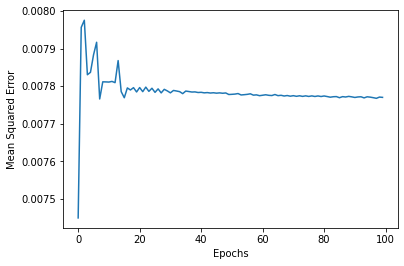

In [65]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

Neural Network 2

---


epochs 100


---


lr 0.01


---


2 hidden layers with lesser neurons


---


2 input variables

In [ ]:
# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(2,4),
                         torch.nn.ReLU(),
                         torch.nn.Linear(4,2),
                         torch.nn.ReLU(),
                         torch.nn.Linear(2,1),
                         torch.nn.Identity()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-66-b0a5275e182e>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

Loss: 0.008833743631839752
Loss: 0.007491692900657654
Loss: 0.007568637374788523
Loss: 0.007390414830297232
Loss: 0.007310716435313225
Loss: 0.007299718447029591
Loss: 0.007437155116349459
Loss: 0.00743925990536809
Loss: 0.00750115979462862


In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

Neural Network 3

---


epochs 100


---


lr 0.01


---


2 hidden layers with lesser neurons


---


2 input variables


---

L1 loss

In [ ]:

# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(2,3),
                         torch.nn.ReLU(),
                         torch.nn.Linear(3,3),
                         torch.nn.ReLU(),
                         torch.nn.Linear(3,1),
                         torch.nn.Identity()
                         );
loss_mse = torch.nn.L1Loss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('L1 Loss')
plt.show()

Neural Network 4

---


epochs 10


---


lr 0.01


---


2 hidden layers with 3 neuron


---


2 input variables


---



In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(2,3),
                         torch.nn.ReLU(),
                         torch.nn.Linear(3,1),
                         torch.nn.Identity()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")


In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()

Neural Network 5

---


epochs 10


---


lr 0.02


---


1 hidden layers with 5 neuron


---


4 input variables


---



In [ ]:
X_tensor = torch.tensor(data_nn[['cost_beer_scaled', 'nightlife', 'peace_score', 'freedom_score']].values.astype(np.float32))
y_tensor = torch.tensor(data_nn[['life_score']].values.astype(np.float32))

In [ ]:
# Initializing Hyperparameters
epochs = 10
learning_rate = 0.02
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                         torch.nn.Linear(4,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Identity()
                         );
loss_mse = torch.nn.MSELoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 1)==0:
         print (f"Loss: {loss_set[i]}")

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.show()